# Title: "New Location Selection on CroqPain restaurant chain" (Python)
### Author: "Sangho Lee"
### Date: "2023-12-28"

### Michel's Task: Finding the Best 10 New Locations Using Regression Analysis with Data from 60 Existing Locations

### I have a dataset containing information on 60 locations, described as follows:

## Croq'Pain

Data on store earnings and other characteristics for the Croq'Pain case. There should be a total of 60 different stores and 10 potential new outlets. The model used for forecasting should be built on data for the existing 60 stores.

### Variables

-   STOR: Store ID
-   CITY: City in the which store is located. Only provided for potential new outlets
-   EARN: Earnings in \$1,000. Operating earnings: annual sales minus annual operating costs. Operating costs exclude the fixed costs of property rent and equipment rental (all capital equipment is purchased by headquarters and rented to the stores). Operating costs include variable costs such as salaries, utilities, supplies, inventories and other expenses.
-   K: Capital invested in the store in \$1,000. This amount is exactly equal to the purchase price of the property (or the lease, in some cases) plus the cost of all equipment and the cost of remodeling the space.
-   SIZE: Size of store in square meters: Total area inside the store
-   EMPL: Number of employees. Not determined until store is opened
-   P15: Number of 15-24 year olds in a 3 km radius around site in 1,000s
-   P25: Number of 25-34 year olds in a 3 km radius around site 1,000s
-   P35: Number of 35-44 year olds in a 3 km radius around site 1,000s
-   P45: Number of 45-54 year olds in a 3 km radius around site 1,000s
-   P55: Number of persons above 55 in a 3 km radius around site 1,000s
-   total: Total population in 3 km radius around site 1,000s
-   INC: Average income in \$1,000 in town or neighborhood around site
-   COMP: Number of competitors in a 1 km radius around site. Establishments considered as competitors include fast food restaurants, bars and cafes equipped providing lunch service
-   NCOMP: Number of restaurants that do not compete directly with CroqPain in 1 km radius around site
-   NREST: Number of non-restaurant businesses in 1 km radius around site
-   PRICE: Monthly rent per square meter of the retail properties in the same locale.
-   CLI = Cost of Living Index. Measures the cost of living in the immediate vicinity to the restaurant site. Aggregate of average cost of living index determined by the commerce department and additional economic measures taken by experts on site
-   CITY: City name for potential new locations

### Now, I will generate a correlation table to examine the relevance of each data point to the "EARN" column, which is our target variable for prediction.

Before analyzing the data, let's load the necessary packages in Python.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyrsm as rsm


## 1. Data Preparation
#### Load/read the data

In [59]:
croqpain = pd.read_parquet('CroqPain.parquet')


In [60]:
croqpain

,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,CITY
0,1,28339.672620,861.0718,129,14.0,8.58,0.98,1.28,0.56,1.000,3.10,27.6,8,1,45,16.1,129,
1,2,-1.455001,630.3028,91,12.0,8.46,1.29,0.72,1.20,1.490,3.10,28.3,2,2,27,11.4,116,
2,3,68.932678,1074.4360,140,13.0,19.25,2.94,2.49,3.71,4.030,5.27,30.2,5,4,5,21.7,142,
3,4,202.073327,882.0064,184,7.0,20.92,3.57,4.93,4.42,4.300,2.96,27.6,2,1,7,11.8,138,
4,5,115.778511,930.6688,144,14.0,11.66,1.70,1.14,2.20,2.140,2.63,33.9,1,3,25,16.6,126,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,66,NaN,924.8080,197,NaN,12.72,1.65,1.96,2.30,1.780,4.39,23.0,1,9,41,12.0,136,Marseilles-1
66,67,NaN,1089.5764,93,NaN,16.66,2.57,2.94,2.82,2.720,4.45,25.2,2,0,5,33.4,133,Marseilles-2
67,68,NaN,737.6620,169,NaN,9.41,0.78,1.94,0.88,1.080,3.45,30.1,4,4,11,9.0,126,Clermont
68,69,NaN,584.0000,149,NaN,19.02,2.50,2.68,4.60,4.567,3.00,28.6,4,5,26,13.4,128,Montpellier


In [61]:
# Checking the data types of each column
data_types = croqpain.dtypes
data_types

STOR       int32
EARN     float64
K        float64
SIZE       int32
EMPL     float64
total    float64
P15      float64
P25      float64
P35      float64
P45      float64
P55      float64
INC      float64
COMP       int32
NCOMP      int32
NREST      int32
PRICE    float64
CLI        int32
CITY      object
dtype: object

#### The data preparation step is complete.
#### The croqpain dataset includes information such as Store #, Earnings, Capital invested, size of the store, Age demographics, Population of the city, City Name, Competitor's information etc,.

#### Considering the data types, all values are numeric and represent continuous variables, making them suitable for a linear regression model.

## 2. Feature Engineering

### In preparing our dataset for regression analysis aimed at predicting potential earnings for new CroqPain locations, it's crucial to examine the existing data from 60 stores closely. By understanding the relationship between store characteristics and their operating earnings, we can identify key factors that influence profitability.

### Target Variable Transformation (EARN):
- The target variable for our model is the store's earnings (EARN), which represents the annual operating profit in thousands of dollars. This continuous variable doesn't require transformation into a binary outcome but will be directly used to predict the profitability of potential new locations.

### Selecting Relevant Features: To predict future earnings effectively, I prioritize features based on their potential impact on a store's performance (Intuitively before looking at the statistics from the model). These include:
- Capital investment (K), as it reflects the initial financial commitment and possibly the quality of the store's infrastructure.
- Store size (SIZE), which could affect the number of customers it can serve at any given time.
- Demographics within a 3 km radius (P15, P25, P35, P45, P55, and total), indicating the target market size and composition.
- Average income in the surrounding area (INC), to gauge the purchasing power of the potential clientele.
- The number of competitors (COMP) and non-competitors (NCOMP) nearby, which affects market saturation and potential customer base.
- Cost of living index (CLI) and price of retail properties (PRICE), providing insight into the economic environment of the location.

### By analyzing these factors, we aim to build a robust model that can estimate the earnings of new stores with a high degree of accuracy. This process involves not just selecting variables that are intuitively linked to earnings but also using statistical methods to confirm their predictive power and relevance. Through this meticulous approach, we can guide the decision-making process on where to establish new CroqPain outlets for maximum profitability.

In [62]:
# Selecting relevant features
croqpqin_features = croqpain[
    ['EARN', 'K', 'SIZE', 'EMPL', 'total', 'P15', 'P25', 'P35', 'P45', 'P55', 'INC', 'COMP', 'NCOMP', 'NREST', 'PRICE', 'CLI']
]
croqpqin_features

,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI
0,28339.672620,861.0718,129,14.0,8.58,0.98,1.28,0.56,1.000,3.10,27.6,8,1,45,16.1,129
1,-1.455001,630.3028,91,12.0,8.46,1.29,0.72,1.20,1.490,3.10,28.3,2,2,27,11.4,116
2,68.932678,1074.4360,140,13.0,19.25,2.94,2.49,3.71,4.030,5.27,30.2,5,4,5,21.7,142
3,202.073327,882.0064,184,7.0,20.92,3.57,4.93,4.42,4.300,2.96,27.6,2,1,7,11.8,138
4,115.778511,930.6688,144,14.0,11.66,1.70,1.14,2.20,2.140,2.63,33.9,1,3,25,16.6,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,924.8080,197,NaN,12.72,1.65,1.96,2.30,1.780,4.39,23.0,1,9,41,12.0,136
66,NaN,1089.5764,93,NaN,16.66,2.57,2.94,2.82,2.720,4.45,25.2,2,0,5,33.4,133
67,NaN,737.6620,169,NaN,9.41,0.78,1.94,0.88,1.080,3.45,30.1,4,4,11,9.0,126
68,NaN,584.0000,149,NaN,19.02,2.50,2.68,4.60,4.567,3.00,28.6,4,5,26,13.4,128


# 3. Exploratory Data Analysis:
#### Examine the distributions of the features and target variable.
#### Look for correlations between features and the target variable to understand the relationships better.

#### Correlations: In the dataset, certain variables show notable correlations with the target variable "EARN". For instance, the number of competitors (COMP) has a positive correlation with earnings, suggesting that stores located in areas with more competitors tend to have higher earnings. This could indicate a busy area with high foot traffic, leading to increased sales. Conversely, demographic variables such as the number of 15-24 year olds (P15), 25-34 year olds (P25), and the 35-44 year olds (P35) show negative correlations with earnings, implying that a higher population of these age groups in the vicinity might not be conducive to higher earnings for CroqPain stores. The cost of living index (CLI) and the capital invested (K) have positive correlations with earnings, albeit very slight, suggesting that stores in areas with higher living costs and those with more capital investment might perform slightly better in terms of earnings.

#### See below!


In [63]:
correlation_matrix = croqpqin_features.corr()
correlation_matrix

,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI
EARN,1.000000,0.017857,0.037843,0.117171,-0.198124,-0.211101,-0.143079,-0.217961,-0.205899,-0.104255,-0.136743,0.264273,-0.186888,0.099019,-0.013165,0.020237
K,0.017857,1.000000,0.725028,0.039449,0.012089,-0.017858,-0.039352,-0.022125,-0.023373,0.135287,0.114064,-0.289702,-0.137783,-0.114739,0.582139,0.201289
SIZE,0.037843,0.725028,1.000000,0.051983,-0.047280,-0.039086,-0.080267,-0.041294,-0.061568,-0.001826,0.123599,-0.154764,0.039719,-0.015441,-0.037055,0.085600
EMPL,0.117171,0.039449,0.051983,1.000000,-0.099301,-0.095293,-0.023749,-0.115835,-0.105221,-0.090102,0.089947,0.121083,0.112134,-0.157576,0.076056,0.138959
total,-0.198124,0.012089,-0.047280,-0.099301,1.000000,0.949753,0.596107,0.959521,0.951690,0.789532,0.050194,-0.244136,0.037083,0.039686,0.037719,0.150707
P15,-0.211101,-0.017858,-0.039086,-0.095293,0.949753,1.000000,0.472971,0.966501,0.942112,0.681257,0.126240,-0.210145,0.050125,0.082196,-0.013362,0.174587
P25,-0.143079,-0.039352,-0.080267,-0.023749,0.596107,0.472971,1.000000,0.470313,0.433551,0.325006,0.031893,-0.092875,0.054960,-0.003444,0.091182,0.090186
P35,-0.217961,-0.022125,-0.041294,-0.115835,0.959521,0.966501,0.470313,1.000000,0.965146,0.688112,0.067611,-0.196131,0.032780,0.086316,-0.015571,0.152135
P45,-0.205899,-0.023373,-0.061568,-0.105221,0.951690,0.942112,0.433551,0.965146,1.000000,0.671030,0.081211,-0.201115,0.070531,0.086940,-0.001652,0.169326
P55,-0.104255,0.135287,-0.001826,-0.090102,0.789532,0.681257,0.325006,0.688112,0.671030,1.000000,-0.086892,-0.271882,-0.026572,-0.048648,0.124438,0.091578


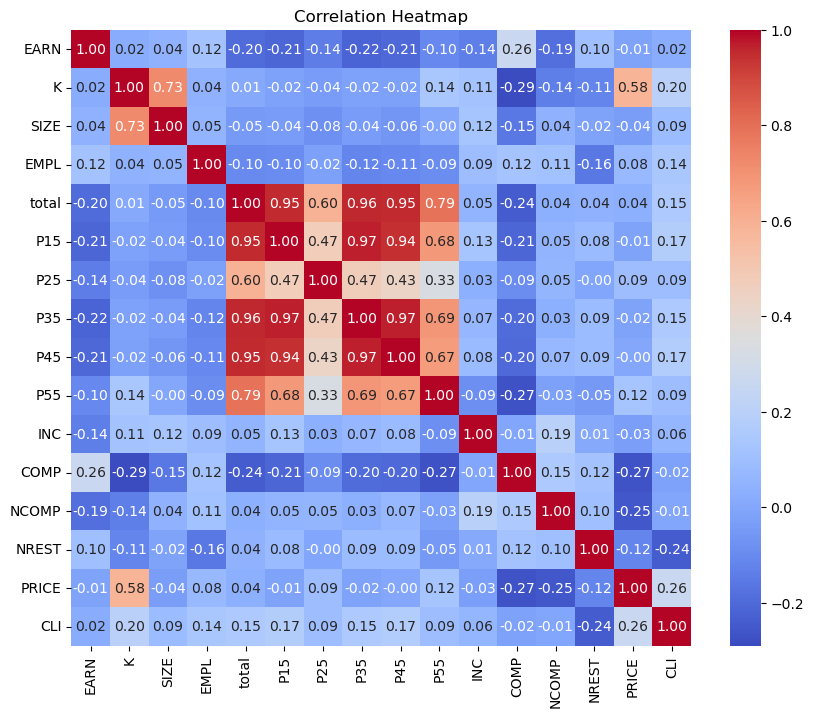

In [64]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(croqpqin_features.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Model Building:

### I will build a regression model and let's see if this data fits a good model

- A new column, 'training', has been effectively incorporated into 'croqpqin_features'. Data from the existing 60 locations will serve as the training set, while the 10 new candidate locations will be utilized for testing and prediction.
- new "train" column: 1 -> train, 0 -> test. 

In [65]:
croqpqin_features['train'] = np.where(croqpqin_features['EARN'].isna(), 0, 1)
croqpqin_features

/tmp/ipykernel_43170/1655671397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  croqpqin_features['train'] = np.where(croqpqin_features['EARN'].isna(), 0, 1)


,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,train
0,28339.672620,861.0718,129,14.0,8.58,0.98,1.28,0.56,1.000,3.10,27.6,8,1,45,16.1,129,1
1,-1.455001,630.3028,91,12.0,8.46,1.29,0.72,1.20,1.490,3.10,28.3,2,2,27,11.4,116,1
2,68.932678,1074.4360,140,13.0,19.25,2.94,2.49,3.71,4.030,5.27,30.2,5,4,5,21.7,142,1
3,202.073327,882.0064,184,7.0,20.92,3.57,4.93,4.42,4.300,2.96,27.6,2,1,7,11.8,138,1
4,115.778511,930.6688,144,14.0,11.66,1.70,1.14,2.20,2.140,2.63,33.9,1,3,25,16.6,126,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,924.8080,197,NaN,12.72,1.65,1.96,2.30,1.780,4.39,23.0,1,9,41,12.0,136,0
66,NaN,1089.5764,93,NaN,16.66,2.57,2.94,2.82,2.720,4.45,25.2,2,0,5,33.4,133,0
67,NaN,737.6620,169,NaN,9.41,0.78,1.94,0.88,1.080,3.45,30.1,4,4,11,9.0,126,0
68,NaN,584.0000,149,NaN,19.02,2.50,2.68,4.60,4.567,3.00,28.6,4,5,26,13.4,128,0


In [66]:
final_data_train = croqpqin_features[croqpqin_features['train'] == 1]

lr = rsm.regress(
    data=final_data_train, 
    rvar='EARN', 
    evar=[
        'K', 'SIZE', 'EMPL', 'total', 'P15', 'P25', 'P35', 'P45', 'P55', 'INC', 'COMP', 'NCOMP', 'NREST', 'PRICE', 'CLI'
    ]
)

lr.summary()

Linear regression (OLS)
Data                 : Not provided
Response variable    : EARN
Explanatory variables: K, SIZE, EMPL, total, P15, P25, P35, P45, P55, INC, COMP, NCOMP, NREST, PRICE, CLI
Null hyp.: the effect of x on EARN is zero
Alt. hyp.: the effect of x on EARN is not zero

           coefficient  std.error  t.value p.value   
Intercept    -4455.993   9977.876   -0.447   0.657   
K               -3.638     10.901   -0.334    0.74   
SIZE            18.368     42.489    0.432   0.668   
EMPL            85.843    152.254    0.564   0.576   
total          911.195   1282.990    0.710   0.481   
P15           -897.804   2726.160   -0.329   0.743   
P25          -1054.648   1374.499   -0.767   0.447   
P35          -1975.644   2226.114   -0.887    0.38   
P45           -313.898   3252.809   -0.097   0.924   
P55           -548.518   1415.913   -0.387     0.7   
INC            -50.515    174.146   -0.290   0.773   
COMP           420.419    229.337    1.833   0.074  .
NCOMP        

#### The output from the linear regression analysis provides critical insights into the factors that influence the earnings of CroqPain stores:

#### Coefficients: The coefficients indicate the expected change in store earnings (EARN) for a one-unit increase in the predictor variable, keeping all other variables constant.
- For example, the coefficient for EMPLOYEES (EMPL) is 85.843, suggesting that each additional employee is associated with an increase in earnings of approximately 85.843 dollars, although this effect is not statistically significant (p = 0.576).

#### P-Values: These values assess the statistical significance of each coefficient. A p-value less than 0.05 would suggest a statistically significant impact on earnings.
- Notably, most variables have high p-values, indicating their effects on earnings are not statistically significant in this model. However, COMP (number of competitors) has a p-value of 0.074, which is close to the threshold of significance, suggesting a potential positive impact on earnings, albeit marginally not significant.

#### R-squared and Adjusted R-squared: The R-squared value of 0.213 indicates that approximately 21.3% of the variability in earnings can be explained by the model. The Adjusted R-squared is -0.055, which, being negative, suggests that the model may not fit the data well and that some predictors might not contribute useful information.

#### F-Statistic: The F-statistic and its p-value (0.794 and 0.677, respectively) indicate the model does not significantly explain the variance in earnings across the stores when considering all predictors together.

#### Key Takeaways:
- The model's overall lack of statistical significance suggests that the selected variables may not strongly predict earnings for CroqPain stores, or the relationships might not be linear.
- The negative Adjusted R-squared value raises concerns about the model's explanatory power, indicating that it might be overfitted with irrelevant predictors or that the linear model is not the best fit for this data.
- The COMP variable shows a borderline significant positive relationship with earnings, hinting that a moderate level of competition might be beneficial, possibly due to increased customer traffic in areas with more food service options.

#### Considerations for Improvement:
- Model refinement is necessary, possibly by removing variables that do not contribute significantly to the model or exploring non-linear relationships.
Additional data or a different analytical approach, such as incorporating interaction terms or using a different type of regression model, might yield more insightful results.

#### We might consider looking the dashboards as a potential strategy for enhancing this model.

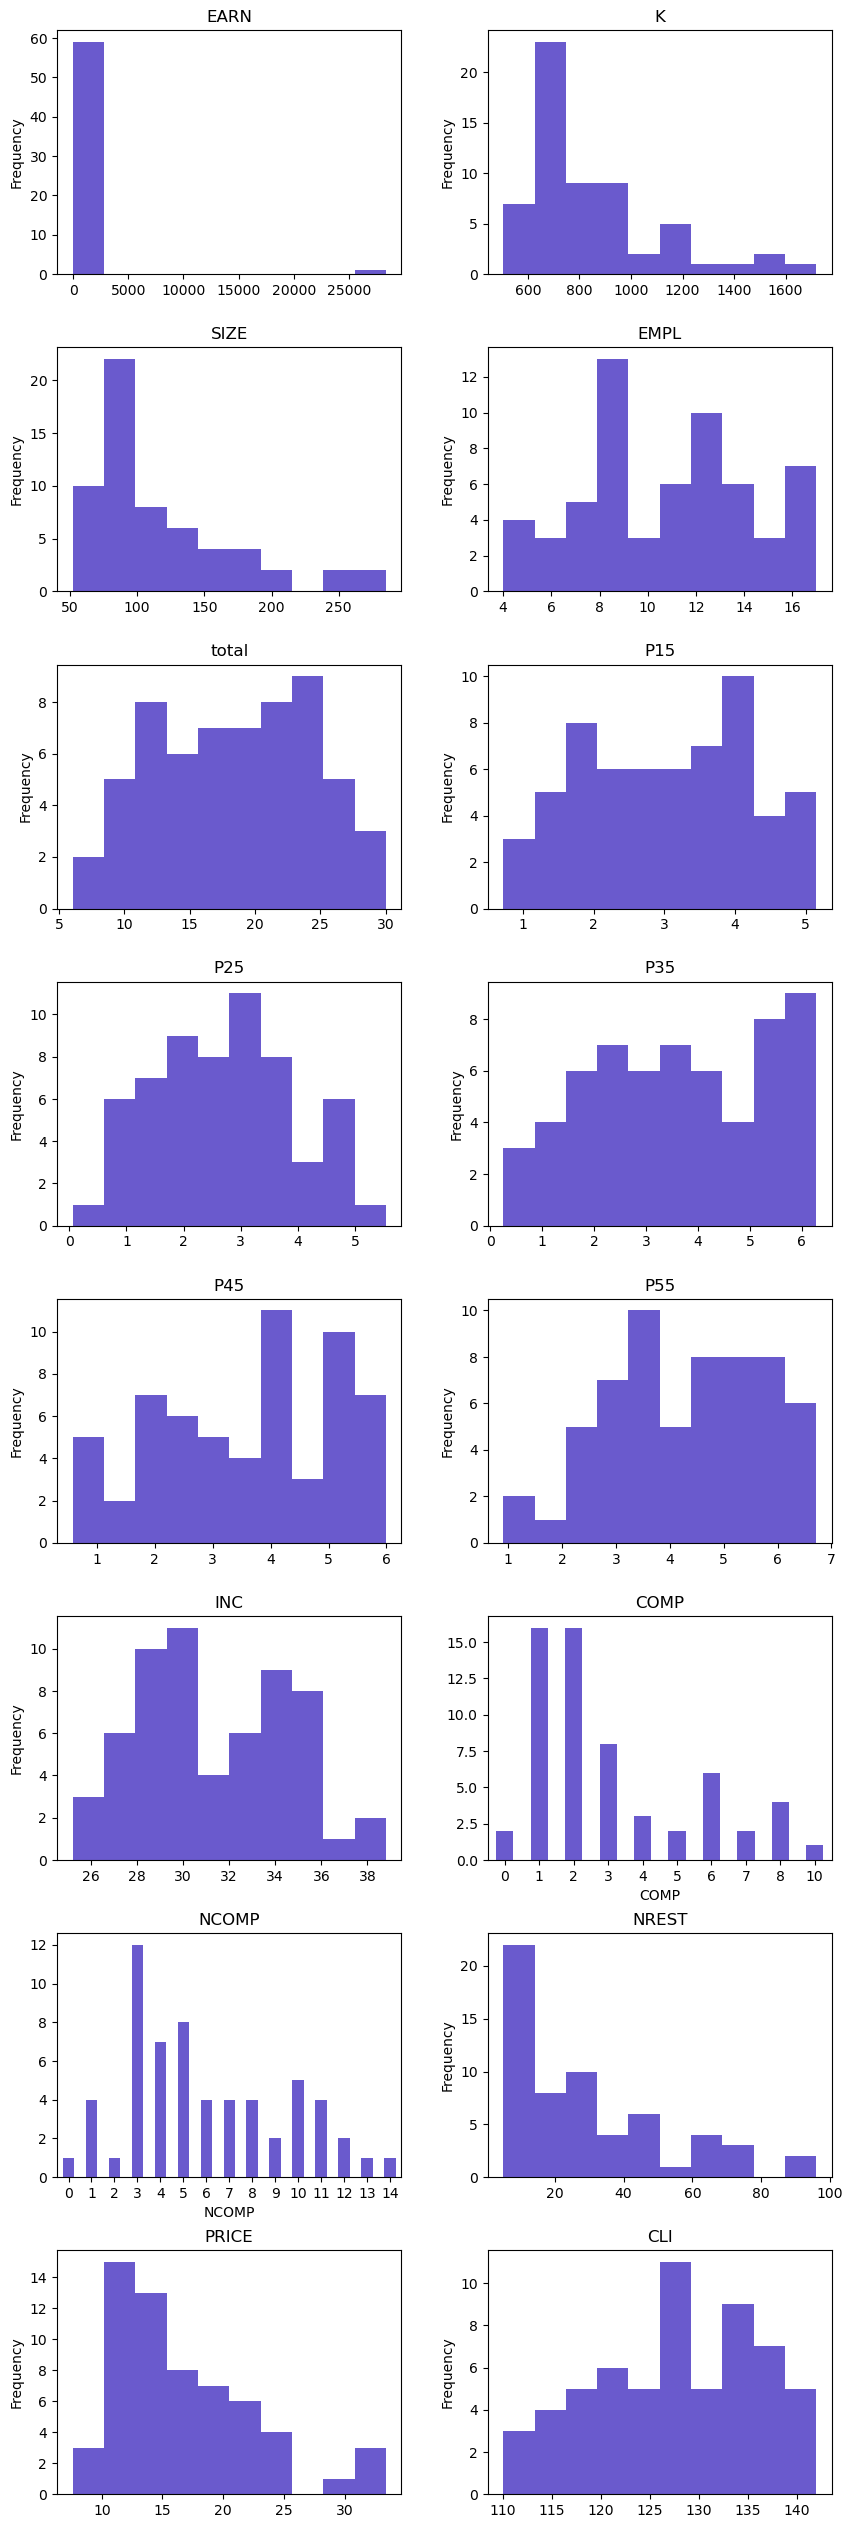

In [67]:
lr.plot("distr")


- #### EARN: Skewed right, most values are low, few high values.
- #### K: Skewed right, most businesses have a low number of Ks, few with more.
- #### SIZE: Highly skewed right, most businesses are smaller in size.
- #### EMPL: Roughly uniform, but with a slight right skew.
- #### total: Multi-modal distribution with several peaks.
- #### P15, P25, P35, P45, P55: All have multi-modal distributions with varying frequencies, suggesting groupings or segments within the data.
- #### INC: Right-skewed, most businesses have a lower INC, with a few outliers.
- #### COMP: Highly skewed right, indicating most companies have a low value for COMP.
- #### NCOMP: Right-skewed with a long tail; a few companies have a much higher NCOMP.
- #### NREST: Right-skewed, most companies have lower values.
- #### PRICE: Right-skewed, many low values, few high values.
- #### CLI: Multi-modal, potentially indicating clusters of businesses with similar CLI values.

- #### These distributions provide insight into the underlying characteristics of your data. For example, skewness in variables like EARN, K, and SIZE suggests that there are outliers with very high values. There is the necessity for data transformation, or the need for robust statistical techniques to handle non-normality.

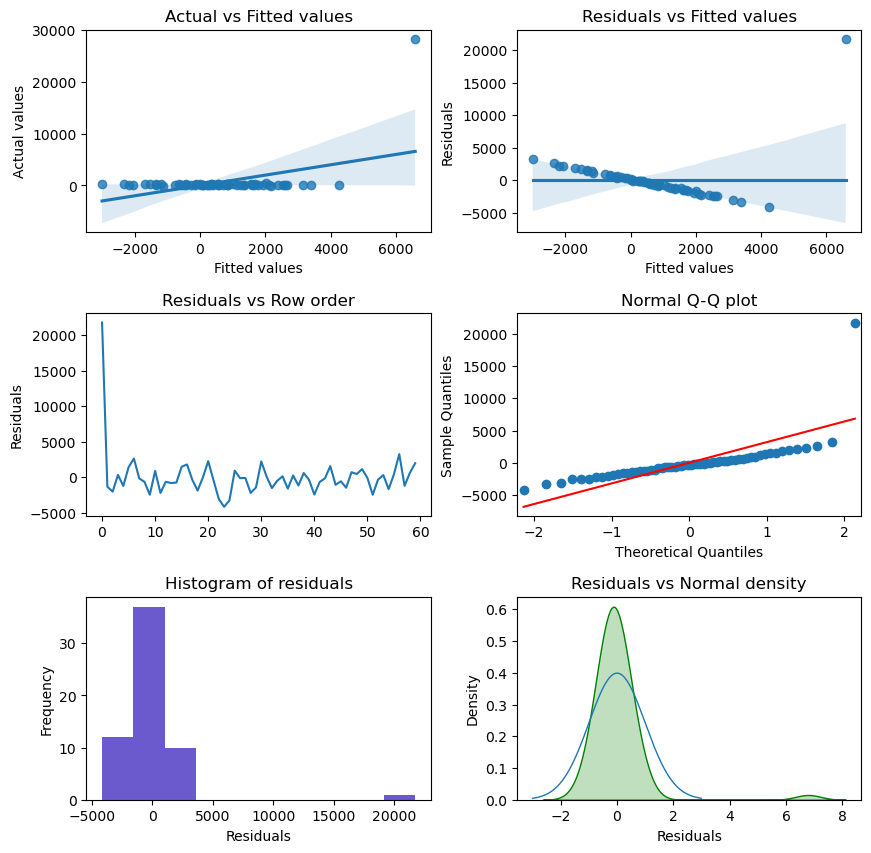

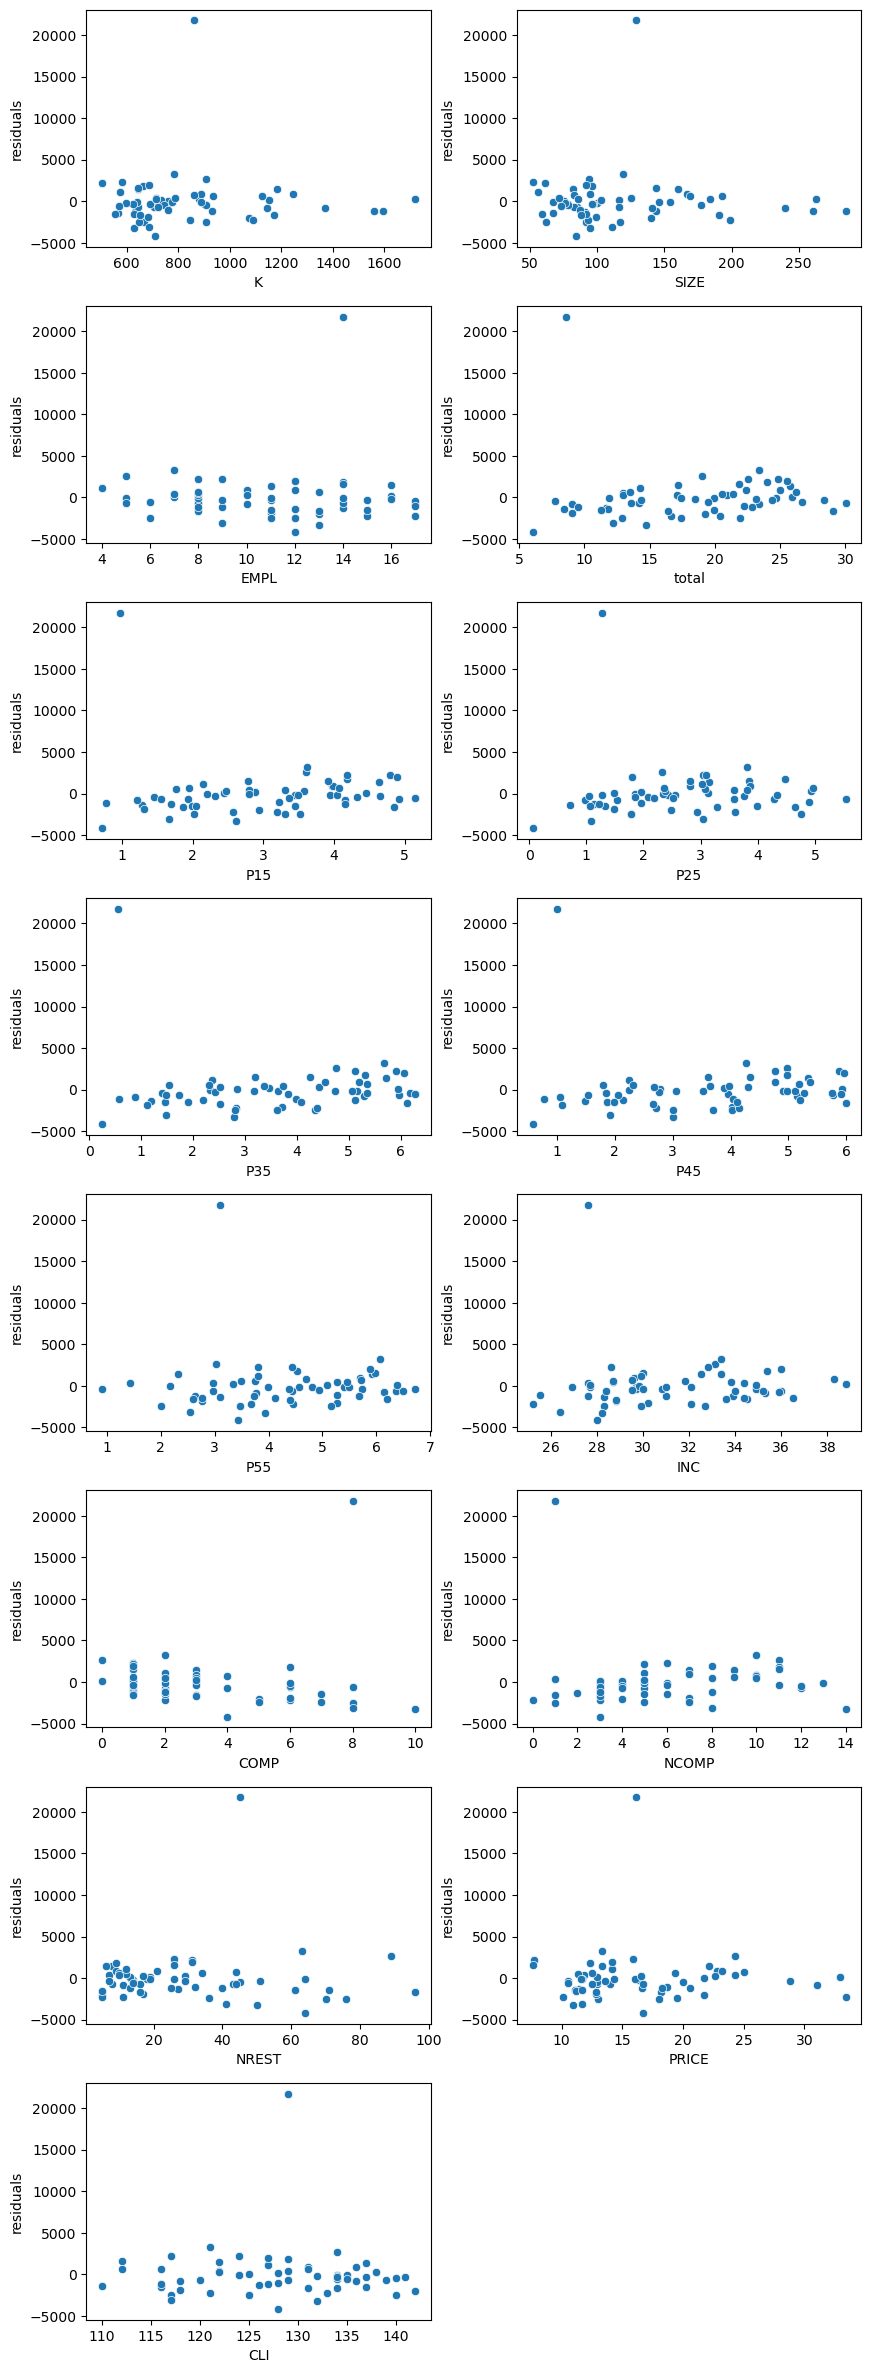

In [68]:
lr.plot("dashboard")
lr.plot("residual")


- #### Actual vs Fitted Values: This plot should ideally show a linear relationship with points randomly distributed around the 45-degree line if the model fits well. Here, there's a pattern which suggests non-linearity or an influential point with very high actual value.

- #### Residuals vs Fitted Values: Ideally, this plot should not show any patterns. However, there is a clear funnel shape, indicating heteroscedasticity—the variability of the residuals is increasing with the fitted values.

- #### Residuals vs Row Order: This plot checks for independence of residuals. No clear pattern should be present if residuals are independent. The plot shows randomness, suggesting that independence is likely met.

- #### Normal Q-Q Plot: This plot compares the distribution of residuals to a normal distribution. Points should lie on the line if residuals are normally distributed. The clear deviation from the line, especially for larger quantiles, indicates the residuals are not normally distributed.

- #### Histogram of Residuals: An ideal histogram would show a bell-shaped distribution of residuals. The provided histogram shows a right-skewed distribution, which does not support the assumption of normally distributed residuals.

- #### Residuals vs Normal Density: This plot overlays a normal density curve over the histogram of the residuals. The peak on the left and the long tail on the right indicate that the residuals are not normally distributed.

### This plots confirms that the model needs a transformation of variables.
### I will work on the outlier which can mitigate the model's risk. see below! 

In [69]:
Q1 = final_data_train.quantile(0.25)
Q3 = final_data_train.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data frame to remove outliers
final_data_train = final_data_train[~((final_data_train < lower_bound) | (final_data_train > upper_bound)).any(axis=1)]

In [70]:
lr_2 = rsm.regress(
    data=final_data_train, 
    rvar='EARN', 
    evar=[
        'K', 'SIZE', 'EMPL', 'total', 'P15', 'P25', 'P35', 'P45', 'P55', 'INC', 'COMP', 'NCOMP', 'NREST', 'PRICE', 'CLI'
    ]
)

lr_2.summary()

Linear regression (OLS)
Data                 : Not provided
Response variable    : EARN
Explanatory variables: K, SIZE, EMPL, total, P15, P25, P35, P45, P55, INC, COMP, NCOMP, NREST, PRICE, CLI
Null hyp.: the effect of x on EARN is zero
Alt. hyp.: the effect of x on EARN is not zero

           coefficient  std.error  t.value p.value     
Intercept     -506.383    109.193   -4.637  < .001  ***
K               -0.108      0.143   -0.752   0.457     
SIZE             1.341      0.491    2.733    0.01   **
EMPL            -1.453      1.586   -0.917   0.366     
total           -2.814     12.291   -0.229    0.82     
P15             47.817     26.149    1.829   0.076    .
P25              3.485     13.475    0.259   0.797     
P35              6.679     21.640    0.309   0.759     
P45             -6.848     31.475   -0.218   0.829     
P55              3.885     13.477    0.288   0.775     
INC             11.314      1.938    5.838  < .001  ***
COMP            -2.924      2.432   -1.202 

### Now this model is improved a lot by removing outliers in the data. 

- #### Strong model with a high R-squared (85.9%), indicating a good fit.
- #### Adjusted R-squared (79.7%) also high, suggesting that the independent variables as a whole are relevant predictors of EARN.
- #### Statistically significant predictors of EARN: Intercept, SIZE, INC, NREST (p < .001 for Intercept and INC, p < .01 for SIZE, and p < .001 for NREST).
- #### F-statistic is significant (p < .001), implying the model is a good fit overall.


- #### This model is clearly superior, with a high R-squared, significant predictors, and an overall significant F-statistic while the first model fails to provide a good fit, with no significant predictors and an insignificant F-statistic.


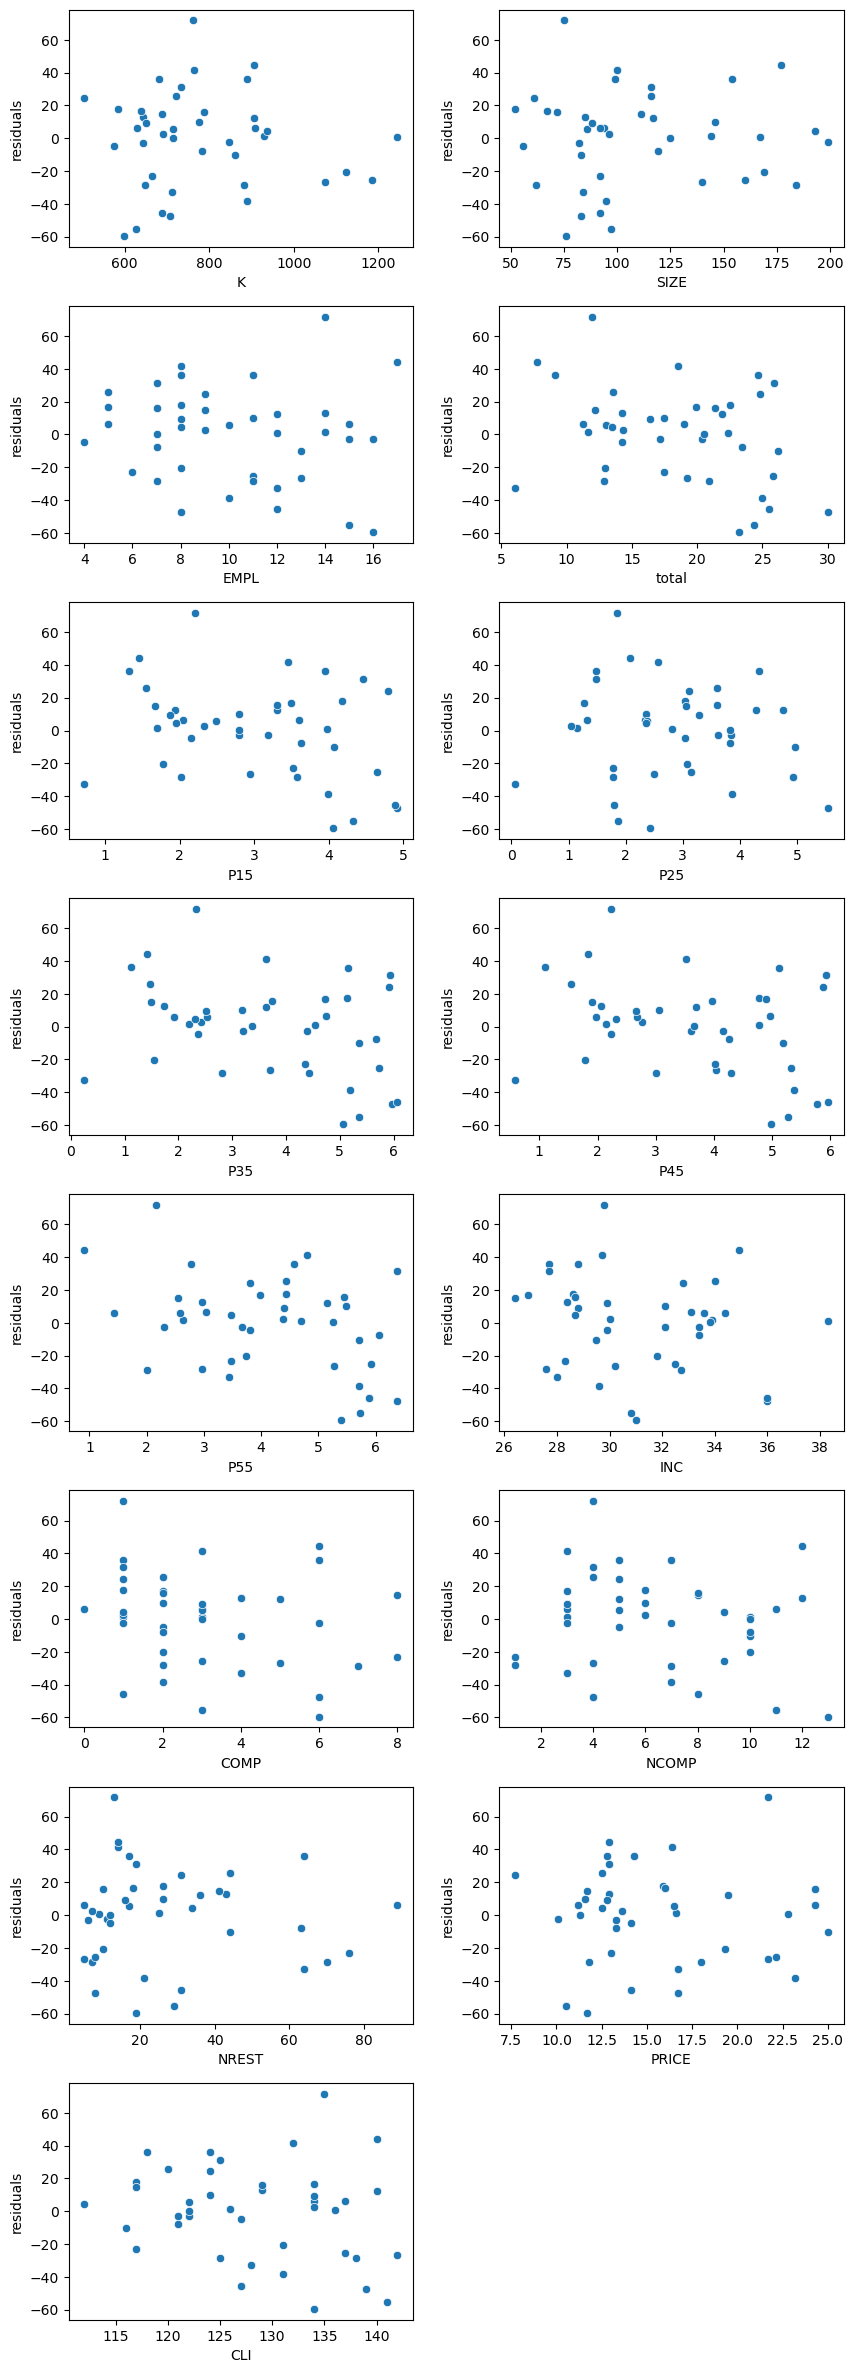

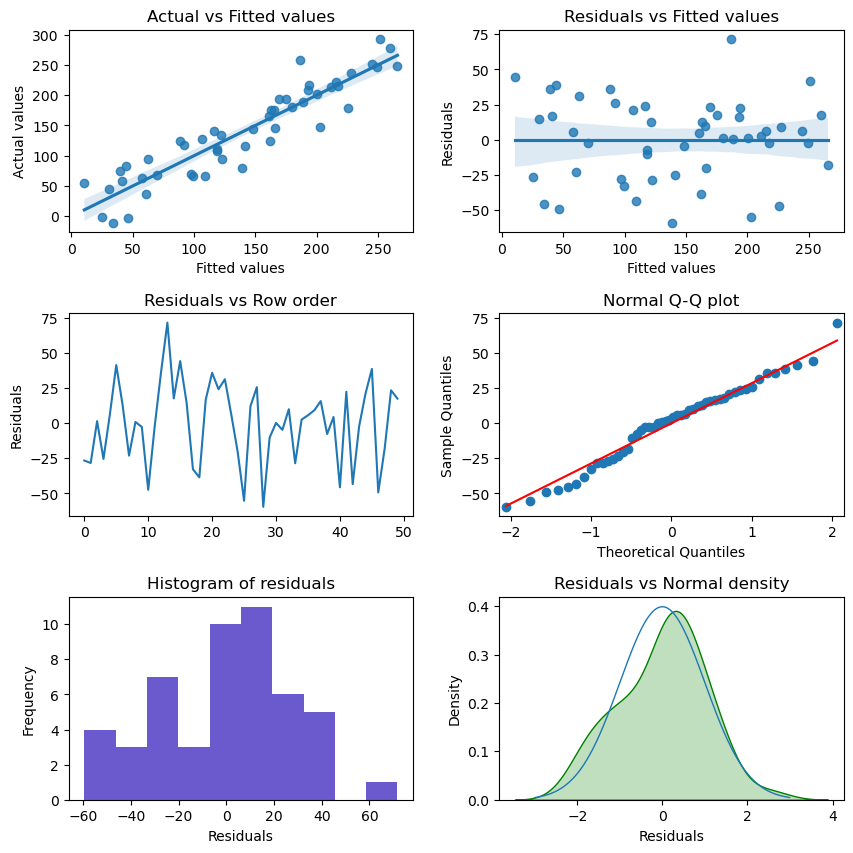

In [71]:
lr_2.plot("residual")
lr_2.plot("dashboard")

- #### Actual vs Fitted Values: Displays a positive linear relationship, which is a good sign for the model, suggesting that as the fitted values increase, so do the actual values.

- #### Residuals vs Fitted Values: No clear pattern, which suggests that the variance of the residuals is constant (homoscedasticity), and there's no apparent structure that the model isn't capturing.

- #### Residuals vs Row Order: Shows no particular trend or cyclical pattern, indicating that residuals are independent and there's no autocorrelation.

- #### Normal Q-Q Plot: Most points lie close to the line, suggesting the residuals are approximately normally distributed, although some deviations exist at the tails.

- #### Histogram of Residuals: The histogram shows a somewhat normal distribution but is not perfectly symmetric, indicating some skewness.

- #### Residuals vs Normal Density: Overlaid normal density curve is mostly a good fit except for the tails, again suggesting slight deviations from normality.

- #### Overall, this model seems to meet most of the key assumptions of linear regression, with some minor concerns about the normality assumption based on the Q-Q plot and the histogram. It appears to be a better fit than the previous models!


#### Although the overall model shows a good fit, there are weak variables with a P-value exceeding 0.05. I plan to eliminate these variables and retrain the model to potentially enhance its performance.

Linear regression (OLS)
Data                 : Not provided
Response variable    : EARN
Explanatory variables: SIZE, INC, NREST
Null hyp.: the effect of x on EARN is zero
Alt. hyp.: the effect of x on EARN is not zero

           coefficient  std.error  t.value p.value     
Intercept     -394.334     89.101   -4.426  < .001  ***
SIZE             0.848      0.218    3.897  < .001  ***
INC             13.108      2.711    4.835  < .001  ***
NREST            1.261      0.384    3.286   0.002   **

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.491, Adjusted R-squared: 0.458
F-statistic: 14.791 df(3, 46), p.value < 0.001
Nr obs: 50


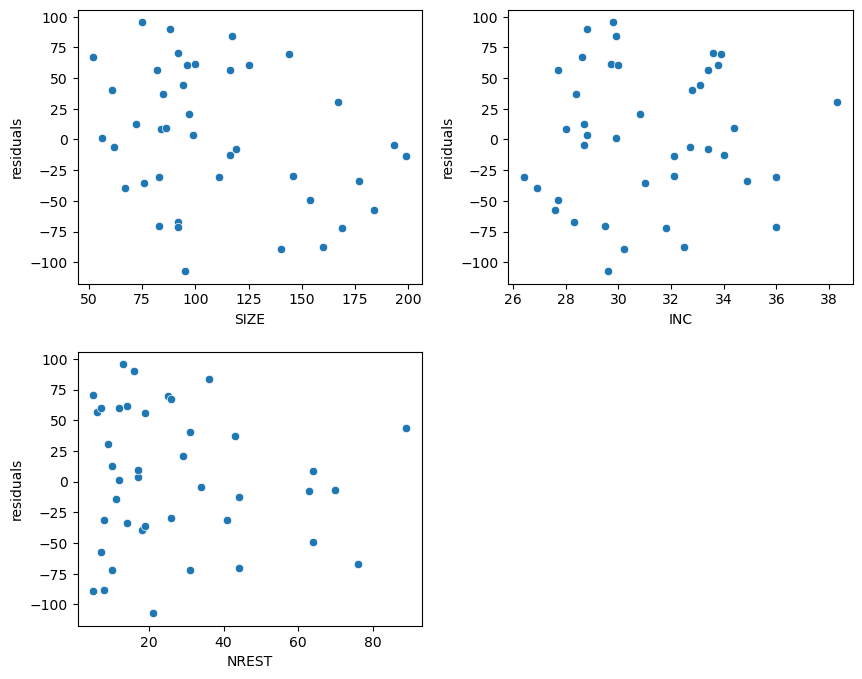

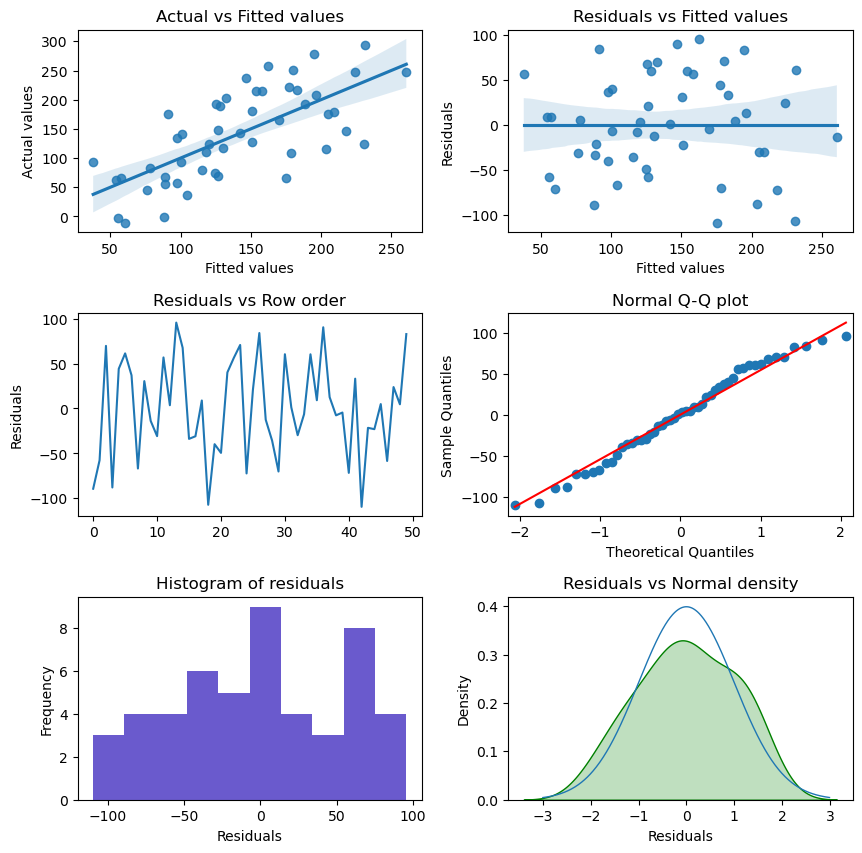

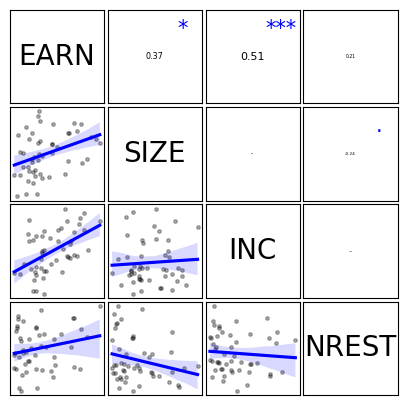

In [72]:
lr_3 = rsm.regress(
    data=final_data_train, 
    rvar='EARN', 
    evar=[
        'SIZE', 'INC', 'NREST'
    ]
)

lr_3.summary()

lr_3.plot("residual")
lr_3.plot("dashboard")
lr_3.plot("corr")


#### Let's do some comparison between these 2 strong models. 

#### lr_2:
- #### High R-squared (85.9%), indicating that the model explains a large proportion of the variance in EARN.
- #### Adjusted R-squared is also high (79.7%), which is good considering the number of predictors.
- #### Several variables (SIZE, INC, NREST) are statistically significant.
- #### Complex model with many variables, which could be prone to overfitting despite the high R-squared.

#### lr_3:
- #### Lower R-squared (49.1%) than the first model, meaning it explains less variance in EARN.
- #### Adjusted R-squared is also lower (45.8%), but this is expected with fewer variables.
- #### All variables (SIZE, INC, NREST) are statistically significant and the model is more parsimonious (simpler with fewer variables).
- #### The F-statistic is significant, indicating the model is a good fit with the data.


#### Which is better?

- #### lr_2 model might be overfitting due to the high number of predictors, despite its higher R-squared value. A high R-squared is not always indicative of a better model, especially if the model is complex and the adjusted R-squared is not proportionally high.
- #### lr_3 model is simpler and still has a good fit as indicated by the significant F-statistic and significant predictors. Simplicity is often preferable in model selection because it's easier to interpret and less likely to overfit.
- #### The second model, with fewer variables, would generally be preferred if the loss of explanatory power (as indicated by the R-squared) is acceptable in the context of the analysis.

In [90]:
croqpain_new_loc = croqpain[croqpain['EARN'].isna()]
croqpain_new_loc['Prediction'] = -394.334 + 0.848 * croqpain_new_loc['SIZE'] + 13.108 * croqpain_new_loc['INC'] + 1.261 * croqpain_new_loc['NREST']
croqpain_new_loc

/tmp/ipykernel_43170/2294834077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  croqpain_new_loc['Prediction'] = -394.334 + 0.848 * croqpain_new_loc['SIZE'] + 13.108 * croqpain_new_loc['INC'] + 1.261 * croqpain_new_loc['NREST']


,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,CITY,Prediction
60,61,NaN,660.1396,54,NaN,6.71,0.60,2.57,0.43,0.690,1.44,38.4,4,5,18,21.7,131,Calais,177.5032
61,62,NaN,733.0000,120,NaN,11.04,1.30,1.40,2.11,1.090,2.68,31.3,7,6,21,12.5,115,Montchanin,144.1874
62,63,NaN,1050.3490,135,NaN,11.91,2.21,1.85,2.33,2.240,2.17,29.0,1,4,13,21.7,135,Aubusson,116.6710
63,64,NaN,836.0000,245,NaN,11.35,3.40,3.00,2.57,1.200,1.35,37.0,5,8,62,12.5,136,Toulouse,376.6040
64,65,NaN,783.6160,96,NaN,3.50,0.26,0.70,0.50,1.200,2.00,30.0,12,7,38,18.0,130,Torcy,128.2320
65,66,NaN,924.8080,197,NaN,12.72,1.65,1.96,2.30,1.780,4.39,23.0,1,9,41,12.0,136,Marseilles-1,125.9070
66,67,NaN,1089.5764,93,NaN,16.66,2.57,2.94,2.82,2.720,4.45,25.2,2,0,5,33.4,133,Marseilles-2,21.1566
67,68,NaN,737.6620,169,NaN,9.41,0.78,1.94,0.88,1.080,3.45,30.1,4,4,11,9.0,126,Clermont,157.3998
68,69,NaN,584.0000,149,NaN,19.02,2.50,2.68,4.60,4.567,3.00,28.6,4,5,26,13.4,128,Montpellier,139.6928
69,70,NaN,681.0000,150,NaN,12.65,1.65,1.32,1.00,3.400,2.37,34.9,3,12,54,15.4,128,Dijon,258.4292


In [91]:
croqpain_new_loc = croqpain_new_loc.sort_values('Prediction', ascending=False)
croqpain_new_loc = croqpain_new_loc[['STOR', 'CITY', 'Prediction']]
croqpain_new_loc = croqpain_new_loc.reset_index(drop=True)
croqpain_new_loc

,STOR,CITY,Prediction
0,64,Toulouse,376.6040
1,70,Dijon,258.4292
2,61,Calais,177.5032
3,68,Clermont,157.3998
4,62,Montchanin,144.1874
5,69,Montpellier,139.6928
6,65,Torcy,128.2320
7,66,Marseilles-1,125.9070
8,63,Aubusson,116.6710
9,67,Marseilles-2,21.1566


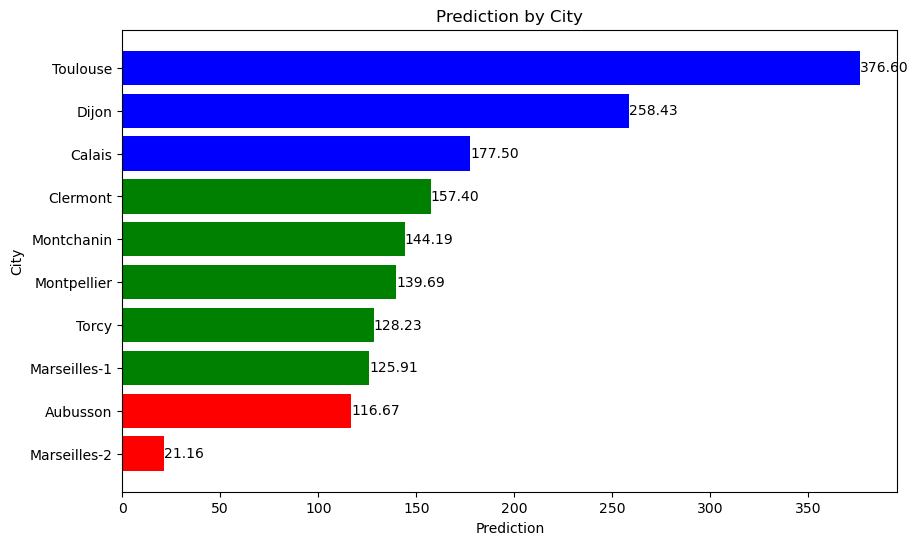

In [94]:
plt.figure(figsize=(10,6))

colors = ['blue' if i < 3 else 'red' if i >= len(croqpain_new_loc) - 2 else 'green' for i in range(len(croqpain_new_loc))]

bars = plt.barh(croqpain_new_loc['CITY'], croqpain_new_loc['Prediction'], color=colors)
plt.xlabel('Prediction')
plt.ylabel('City')
plt.title('Prediction by City')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center')

plt.gca().invert_yaxis()  
plt.show()

# 5. Interpretation and Conclusion:

### Strong Performance Predictions:
##### - The model projects the highest earnings for the store in Toulouse, predicting a robust $376.604 thousand. This could indicate a strong market presence or advantageous location factors contributing to a potentially lucrative business environment for expansion.

### Moderate Earnings Potential:
##### - Stores in Dijon and Calais are anticipated to have moderate earnings, with predictions of $258.429 thousand and $177.503 thousand, respectively. These cities may present a balanced competitive environment where profitability is still attainable.

### Lower-Tier Projections:
##### - Clermont, Montchanin, and Montpellier show closely grouped predicted earnings, ranging from approximately $139.693 thousand to $157.400 thousand. Such forecasts suggest modest yet stable earnings potential, perhaps due to market saturation or moderate competition.

### Challenges in Expansion:
##### - Torcy and Marseilles-1, with predictions of $128.232 thousand and $125.907 thousand, respectively, along with Aubusson at $116.671 thousand, indicate markets where earnings are expected to be lower. These areas might require careful strategic planning due to tougher market conditions or limited growth opportunities.

### Marginal Market Performance:
##### - The store in Marseilles-2 is forecasted to have the lowest earnings at $21.157 thousand, signaling a challenging market environment. This suggests the need for in-depth market analysis to understand the factors limiting profitability and assess whether strategic initiatives could enhance performance.


### Risk Management and Mitigation:
##### - For cities like Torcy, Marseilles-1, and especially Marseilles-2, the lower predicted earnings call for a cautious approach. Detailed market research and competitive analysis are crucial to mitigate risks and uncover potential for profitability.

### In sum, the predictive model offers actionable insights into market dynamics across various cities, guiding the CroqPain restaurant chain in optimizing its expansion strategy to align with anticipated earnings, market conditions, and competitive landscapes.